In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customer_demographic = pd.read_excel('C:\\Users\\adetu\\Desktop\\Customer_Churn_Data_Large.xlsx', sheet_name = 'Customer_Demographics')
transaction_history = pd.read_excel('C:\\Users\\adetu\\Desktop\\Customer_Churn_Data_Large.xlsx', sheet_name = 'Transaction_History')
customer_service = pd.read_excel('C:\\Users\\adetu\\Desktop\\Customer_Churn_Data_Large.xlsx', sheet_name = 'Customer_Service')
online_activity = pd.read_excel('C:\\Users\\adetu\\Desktop\\Customer_Churn_Data_Large.xlsx', sheet_name = 'Online_Activity')
churn_status = pd.read_excel('C:\\Users\\adetu\\Desktop\\Customer_Churn_Data_Large.xlsx', sheet_name = 'Churn_Status')

# 1. Explore Customer Demographics Data

Let's begin by exploring the `customer_demographic` dataset to understand its structure, distributions, and potential issues.


Customer Demographic Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1000 non-null   int64 
 1   Age            1000 non-null   int64 
 2   Gender         1000 non-null   object
 3   MaritalStatus  1000 non-null   object
 4   IncomeLevel    1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


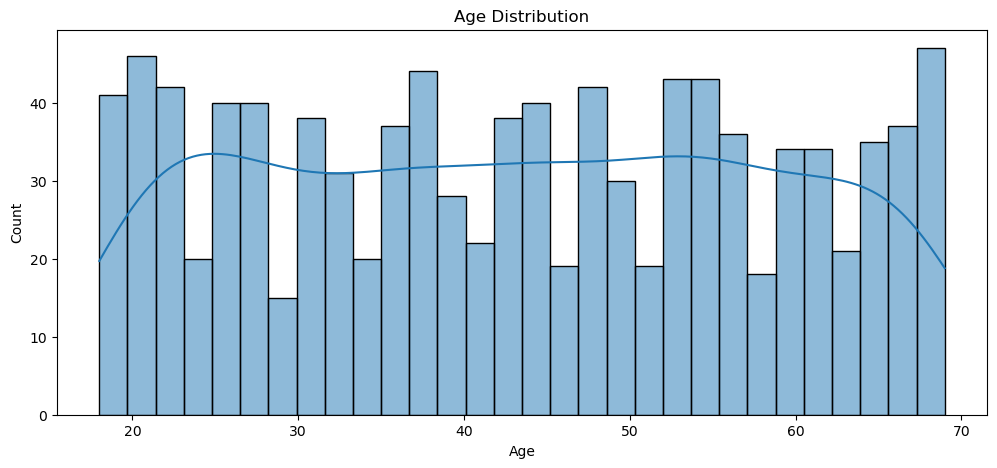

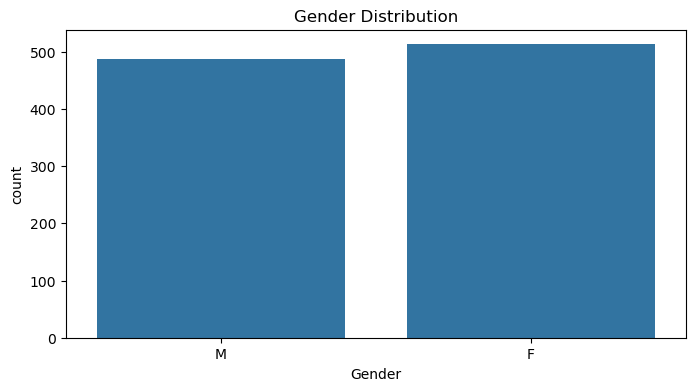

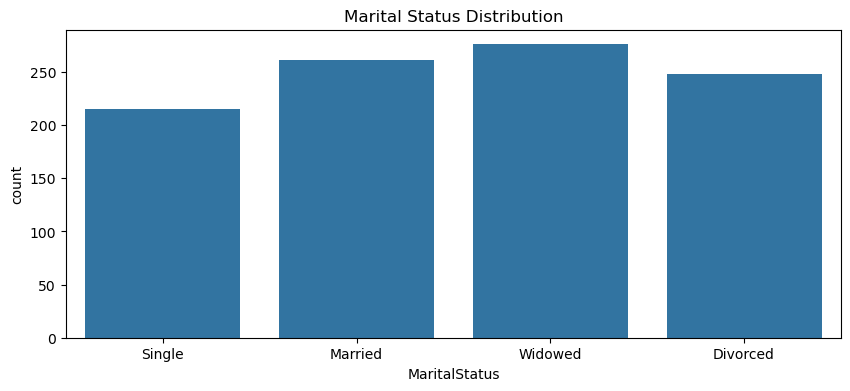

In [3]:
# Display the structure of the customer demographic data
print("Customer Demographic Data Structure:")
customer_demographic.info()

# Show summary statistics
customer_demographic.describe(include='all')

# Preview the first few rows
customer_demographic.head()

# Check for missing values in each column
customer_demographic.isnull().sum()

# Visualize distributions of key demographic features
plt.figure(figsize=(12, 5))
sns.histplot(customer_demographic['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', data=customer_demographic)
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(x='MaritalStatus', data=customer_demographic)
plt.title('Marital Status Distribution')
plt.show()

# 2. Explore Transaction History Data

Analyze transaction frequency, amounts, and patterns in the `transaction_history` dataset.

In [4]:
# Basic info and statistics
transaction_history.info()
transaction_history.describe()

# Preview data
transaction_history.head()

# Check for missing values
transaction_history.isnull().sum()

# 1. Aggregate transaction features per customer

# Total amount spent
total_spent = transaction_history.groupby('CustomerID')['AmountSpent'].sum().rename('TotalAmountSpent')

# Average amount spent
avg_spent = transaction_history.groupby('CustomerID')['AmountSpent'].mean().rename('AvgAmountSpent')

# Number of transactions
num_transactions = transaction_history.groupby('CustomerID').size().rename('NumTransactions')

# Spend per product category (pivot table)
category_spend = transaction_history.pivot_table(
    index='CustomerID',
    columns='ProductCategory',
    values='AmountSpent',
    aggfunc='sum',
    fill_value=0
)



# 2. Combine all features into a single DataFrame
transaction_features = pd.concat([total_spent, avg_spent, num_transactions, category_spend], axis=1).reset_index()

transaction_features.head()
transaction_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       5054 non-null   int64         
 1   TransactionID    5054 non-null   int64         
 2   TransactionDate  5054 non-null   datetime64[ns]
 3   AmountSpent      5054 non-null   float64       
 4   ProductCategory  5054 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 197.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        1000 non-null   int64  
 1   TotalAmountSpent  1000 non-null   float64
 2   AvgAmountSpent    1000 non-null   float64
 3   NumTransactions   1000 non-null   int64  
 4   Books             1000 non-null   float64
 5   C

# Feature Engineering for Customer Service Data

In [5]:


# 1. Convert InteractionDate to datetime
customer_service['InteractionDate'] = pd.to_datetime(customer_service['InteractionDate'])

# 2. Aggregate features per customer

# Total number of interactions
total_interactions = customer_service.groupby('CustomerID').size().rename('TotalInteractions')

# Number of complaints, inquiries, feedback
complaints = customer_service[customer_service['InteractionType'] == 'Complaint'].groupby('CustomerID').size().rename('NumComplaints')
inquiries = customer_service[customer_service['InteractionType'] == 'Inquiry'].groupby('CustomerID').size().rename('NumInquiries')
feedbacks = customer_service[customer_service['InteractionType'] == 'Feedback'].groupby('CustomerID').size().rename('NumFeedbacks')

# Number of resolved and unresolved interactions
resolved = customer_service[customer_service['ResolutionStatus'] == 'Resolved'].groupby('CustomerID').size().rename('NumResolved')
unresolved = customer_service[customer_service['ResolutionStatus'] == 'Unresolved'].groupby('CustomerID').size().rename('NumUnresolved')

# 3. Combine all features into a single DataFrame
service_features = pd.concat([
    total_interactions, complaints, inquiries, feedbacks, resolved, unresolved
], axis=1).fillna(0).reset_index()

print(service_features.head())
service_features.info()



   CustomerID  TotalInteractions  NumComplaints  NumInquiries  NumFeedbacks  \
0           1                  1            0.0           1.0           0.0   
1           2                  1            0.0           1.0           0.0   
2           3                  1            0.0           1.0           0.0   
3           4                  2            0.0           2.0           0.0   
4           6                  1            0.0           0.0           1.0   

   NumResolved  NumUnresolved  
0          1.0            0.0  
1          1.0            0.0  
2          1.0            0.0  
3          1.0            1.0  
4          1.0            0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         668 non-null    int64  
 1   TotalInteractions  668 non-null    int64  
 2   NumComplaints      668 non-null 

# Explore Online Activity Data

Examine login frequency, session durations, and feature usage in the `online_activity` dataset.

In [6]:
# Basic info and statistics
online_activity.info()
online_activity.describe()

# Preview data
online_activity.head()

# Check for missing values
online_activity.isnull().sum()


# 3. One-hot encode ServiceUsage
online_activity = pd.get_dummies(online_activity, columns=['ServiceUsage'], drop_first=True)

print(online_activity.head())

online_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerID      1000 non-null   int64         
 1   LastLoginDate   1000 non-null   datetime64[ns]
 2   LoginFrequency  1000 non-null   int64         
 3   ServiceUsage    1000 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 31.4+ KB
   CustomerID LastLoginDate  LoginFrequency  ServiceUsage_Online Banking  \
0           1    2023-10-21              34                        False   
1           2    2023-12-05               5                        False   
2           3    2023-11-15               3                        False   
3           4    2023-08-25               2                        False   
4           5    2023-10-27              41                        False   

   ServiceUsage_Website  
0                 False  
1   

# Explore Churn Status Data

Analyze churn_status data, checking class distribution and identifying potential issues.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CustomerID   1000 non-null   int64
 1   ChurnStatus  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


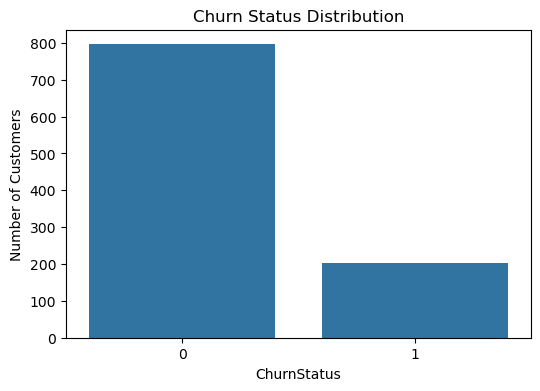

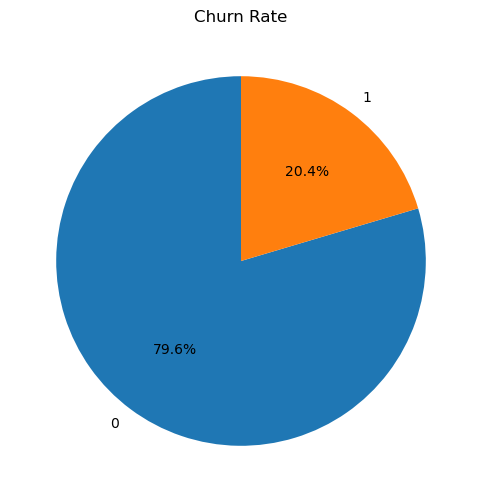

In [7]:
# Basic info and statistics
churn_status.info()
churn_status.head()

# Check for missing values
churn_status.isnull().sum()

# Churn class distribution
churn_counts = churn_status['ChurnStatus'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Churn Status Distribution')
plt.ylabel('Number of Customers')
plt.show()

# Pie chart of churn rates
churn_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6,6), title='Churn Rate')
plt.ylabel('')
plt.show()

# Merge Datasets

Merge all cleaned datasets into a single DataFrame on Customer_ID. Resolve mismatches and duplicates.

In [8]:
# Merge datasets on Customer_ID
merged_df = customer_demographic.merge(transaction_features, on='CustomerID', how='left')
merged_df = merged_df.merge(service_features, on='CustomerID', how='left')
merged_df = merged_df.merge(online_activity, on='CustomerID', how='left')
merged_df = merged_df.merge(churn_status, on='CustomerID', how='inner')

# Check for missing values after merge
merged_df.isnull().sum()

# Remove any duplicate Customer_IDs
merged_df.drop_duplicates(subset='CustomerID', inplace=True)

merged_df.head()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   CustomerID                   1000 non-null   int64         
 1   Age                          1000 non-null   int64         
 2   Gender                       1000 non-null   object        
 3   MaritalStatus                1000 non-null   object        
 4   IncomeLevel                  1000 non-null   object        
 5   TotalAmountSpent             1000 non-null   float64       
 6   AvgAmountSpent               1000 non-null   float64       
 7   NumTransactions              1000 non-null   int64         
 8   Books                        1000 non-null   float64       
 9   Clothing                     1000 non-null   float64       
 10  Electronics                  1000 non-null   float64       
 11  Furniture                    1000 non-null  

# Feature Engineering

Create new features and encode categorical variables.

In [9]:
# Encode categorical variables
merged_df = pd.get_dummies(merged_df, columns=['Gender', 'MaritalStatus','IncomeLevel'], drop_first=True)

# Normalize numerical features
from sklearn.preprocessing import StandardScaler
num_cols = ['Age', 'TotalAmountSpent', 'AvgAmountSpent', 'NumTransactions',
            'NumComplaints', 'NumResolved', 'NumUnresolved', 'NumInquiries', 'NumFeedbacks',
            'TotalInteractions', 'Books' 'Electronics', 'Clothing', 'Furniture','Groceries']
for col in num_cols:
    if col in merged_df.columns:
        merged_df[col] = StandardScaler().fit_transform(merged_df[[col]])
merged_df.head()




,CustomerID,Age,TotalAmountSpent,AvgAmountSpent,NumTransactions,Books,Clothing,Electronics,Furniture,Groceries,...,LoginFrequency,ServiceUsage_Online Banking,ServiceUsage_Website,ChurnStatus,Gender_M,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,IncomeLevel_Low,IncomeLevel_Medium
0,1,1.229628,-1.152196,2.113790,-1.557954,0.00,-0.828824,416.50,-0.858451,-0.873666,...,34,False,False,0,True,False,True,False,True,False
1,2,1.426547,0.379758,-0.349747,0.747849,0.00,0.656226,794.05,-0.503162,-0.205436,...,5,False,True,1,True,True,False,False,True,False
2,3,-1.658518,0.590481,0.441474,0.363548,241.06,-0.661156,0.00,2.028713,1.092180,...,3,False,True,0,True,False,True,False,True,False
3,4,-1.461599,-0.473822,-0.823723,-0.020752,0.00,-0.683645,367.09,0.482570,-0.460175,...,2,False,True,0,True,False,False,True,True,False
4,5,-1.461599,0.994845,0.017392,1.132149,0.00,-0.828824,683.54,0.540435,2.201201,...,41,False,True,0,True,False,False,False,False,True


# Handle Missing Values

Impute or remove remaining missing values in the merged dataset.

In [10]:
# Impute missing numerical features with median
for col in num_cols:
    if col in merged_df.columns:
        merged_df[col].fillna(merged_df[col].median(), inplace=True)

# For categorical features, fill missing with mode
cat_cols = [col for col in merged_df.columns if merged_df[col].dtype == 'object']
for col in cat_cols:
    merged_df[col].fillna(merged_df[col].mode()[0], inplace=True)
   
    # save the cleaned DataFrame
merged_df.to_csv('cleaned_customer_data.csv', index=False)
merged_df.head()


C:\Users\adetu\AppData\Local\Temp\ipykernel_7124\3658216018.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col].fillna(merged_df[col].median(), inplace=True)


,CustomerID,Age,TotalAmountSpent,AvgAmountSpent,NumTransactions,Books,Clothing,Electronics,Furniture,Groceries,...,LoginFrequency,ServiceUsage_Online Banking,ServiceUsage_Website,ChurnStatus,Gender_M,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,IncomeLevel_Low,IncomeLevel_Medium
0,1,1.229628,-1.152196,2.113790,-1.557954,0.00,-0.828824,416.50,-0.858451,-0.873666,...,34,False,False,0,True,False,True,False,True,False
1,2,1.426547,0.379758,-0.349747,0.747849,0.00,0.656226,794.05,-0.503162,-0.205436,...,5,False,True,1,True,True,False,False,True,False
2,3,-1.658518,0.590481,0.441474,0.363548,241.06,-0.661156,0.00,2.028713,1.092180,...,3,False,True,0,True,False,True,False,True,False
3,4,-1.461599,-0.473822,-0.823723,-0.020752,0.00,-0.683645,367.09,0.482570,-0.460175,...,2,False,True,0,True,False,False,True,True,False
4,5,-1.461599,0.994845,0.017392,1.132149,0.00,-0.828824,683.54,0.540435,2.201201,...,41,False,True,0,True,False,False,False,False,True


# Handle Class Imbalance

Analyze churn class distribution and apply balancing techniques.

ChurnStatus
0    796
1    204
Name: count, dtype: int64


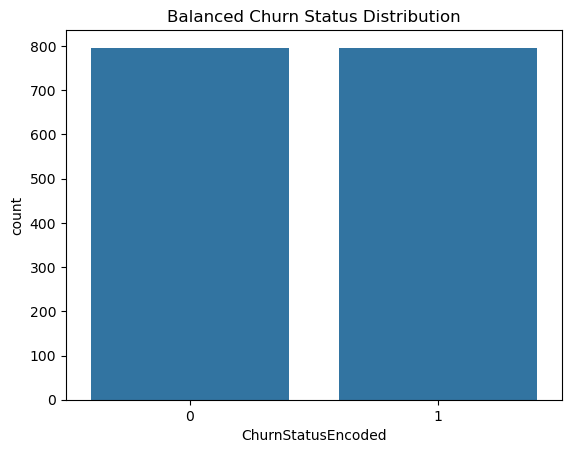

In [11]:
# Check class distribution
print(merged_df['ChurnStatus'].value_counts())

# Encode target variable
from sklearn.preprocessing import LabelEncoder
merged_df['ChurnStatusEncoded'] = LabelEncoder().fit_transform(merged_df['ChurnStatus'])


# Apply SMOTE for balancing
from imblearn.over_sampling import SMOTE
X = merged_df.drop(['CustomerID', 'ChurnStatus', 'ChurnStatusEncoded','LastLoginDate'], axis=1)
y = merged_df['ChurnStatusEncoded']

smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

# Visualize new class distribution
sns.countplot(x=y_bal)
plt.title('Balanced Churn Status Distribution')
plt.show()


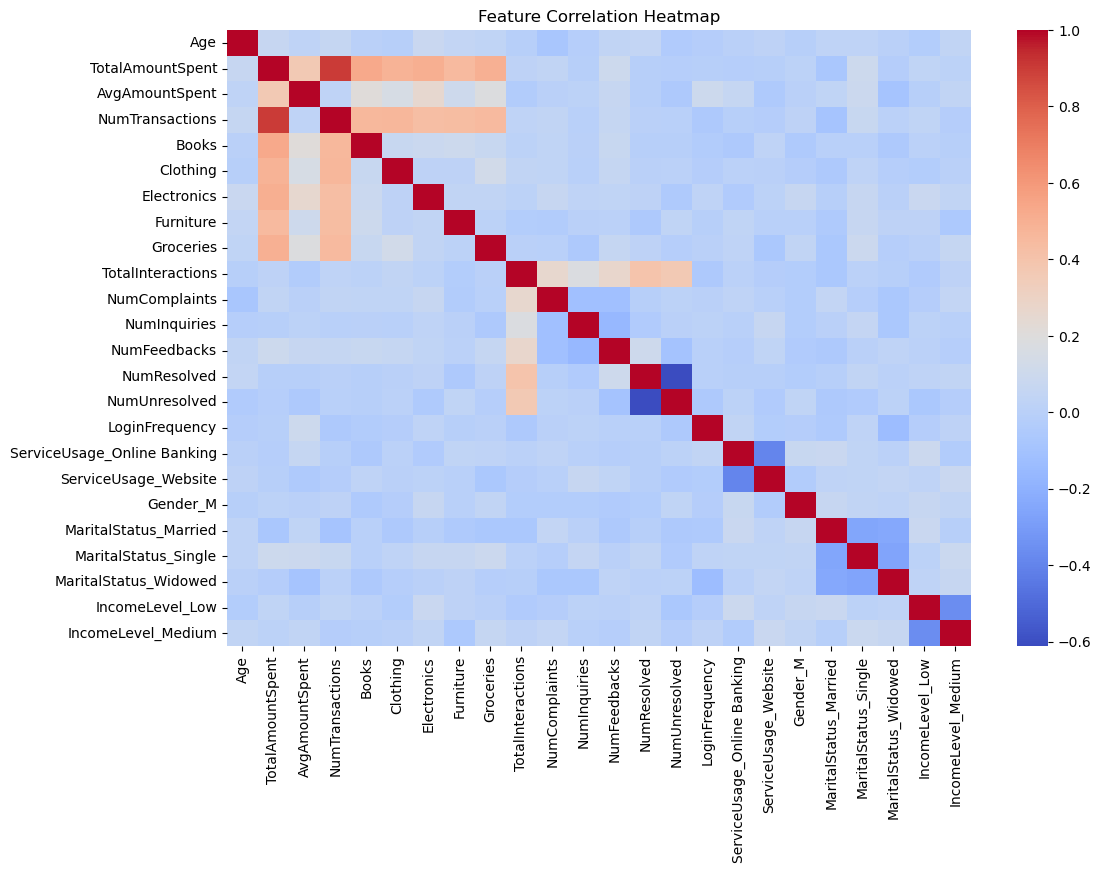

In [12]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(pd.DataFrame(X_bal).corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Model Training and Evaluation: Imports and Setup

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib

# Train-Test Split for Model Evaluation

In [14]:
# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal)

print(f"Training Set Size: {X_train.shape[0]}, Test Set Size: {X_test.shape[0]}")


Training Set Size: 1273, Test Set Size: 319


# Baseline Model: Logistic Regression Evaluation

In [15]:
# --- Baseline Model: Logistic Regression ---
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

print("\n=== Logistic Regression Results ===")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_lr))



=== Logistic Regression Results ===
[[104  56]
 [ 47 112]]
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       160
           1       0.67      0.70      0.69       159

    accuracy                           0.68       319
   macro avg       0.68      0.68      0.68       319
weighted avg       0.68      0.68      0.68       319

ROC AUC Score: 0.752869496855346


c:\Users\adetu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest Classifier: Training, Evaluation, and Feature Importance


=== Random Forest Results ===
[[146  14]
 [ 36 123]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       160
           1       0.90      0.77      0.83       159

    accuracy                           0.84       319
   macro avg       0.85      0.84      0.84       319
weighted avg       0.85      0.84      0.84       319

ROC AUC Score: 0.9047759433962264


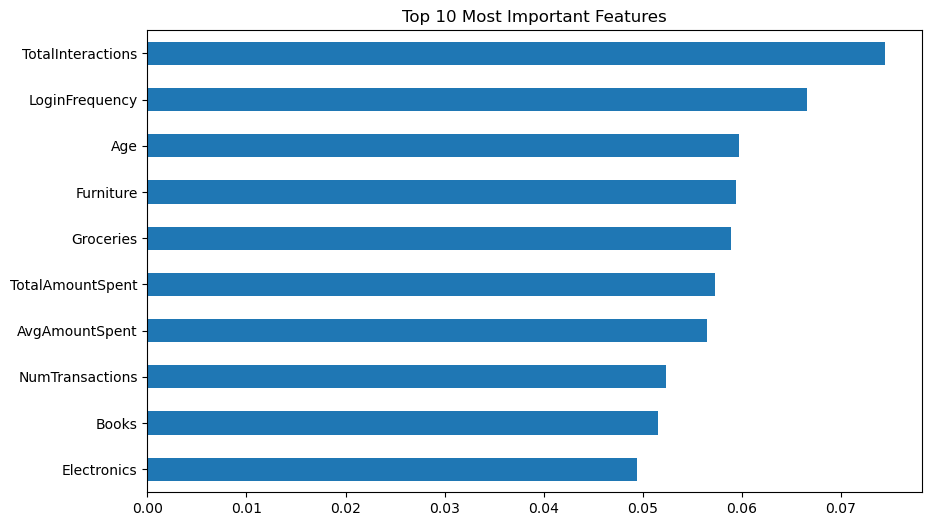

In [16]:
# --- Random Forest Classifier ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("\n=== Random Forest Results ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

# --- Feature Importance ---
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title("Top 10 Most Important Features")
plt.gca().invert_yaxis()
plt.show()

# Random Forest Confusion Matrix and Heatmap Visualization

[[146  14]
 [ 36 123]]


<Axes: >

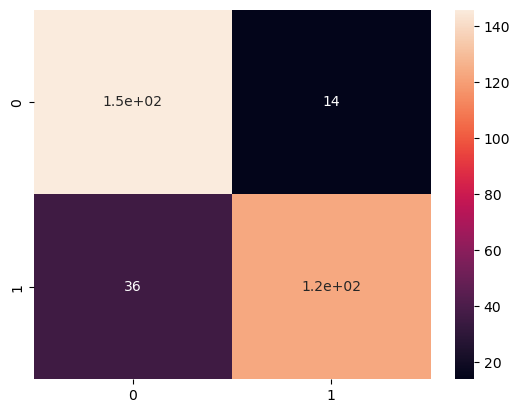

In [17]:
print(confusion_matrix(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf),annot=True)

# Random Forest Hyperparameter Tuning with GridSearchCV

In [18]:
#  Hyperparameter Tuning 
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)


Best Parameters from GridSearchCV:
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


# Tuned Random Forest Classifier: Training and Evaluation

In [19]:
# --- Random Forest Classifier ---
rf2 = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
rf2.fit(X_train, y_train)

y_pred_rf2 = rf2.predict(X_test)
y_proba_rf2 = rf2.predict_proba(X_test)[:, 1]

print("\n=== Random Forest Results ===")
print(confusion_matrix(y_test, y_pred_rf2))
print(classification_report(y_test, y_pred_rf2))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf2))


=== Random Forest Results ===
[[148  12]
 [ 35 124]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       160
           1       0.91      0.78      0.84       159

    accuracy                           0.85       319
   macro avg       0.86      0.85      0.85       319
weighted avg       0.86      0.85      0.85       319

ROC AUC Score: 0.9079205974842768


# Save Final Random Forest Model

In [ ]:
# Save Final Model 
joblib.dump(rf, 'customer_churn_model.pkl')
print("Model saved as 'customer_churn_model.pkl'")